# Using submodel sei-cracks in PyBaMM
In this notebook we show how to use the sei-crack submodle for additional SEI growth on cracks in the anode. To see all of the models and submodels available in PyBaMM, please take a look at the documentation [here](https://pybamm.readthedocs.io/en/latest/source/models/index.html).

In [1]:
import pybamm
import os
import numpy as np
import matplotlib.pyplot as plt
os.chdir(pybamm.__path__[0]+'/..')
model = pybamm.lithium_ion.DFN(
    build=False, options={"particle": "Fickian diffusion", "sei":"solvent-diffusion limited", "sei film resistance":"distributed", "sei porosity change":False, "loss of active materials":True}
)
chemistry = pybamm.parameter_sets.Chen2020
param = pybamm.ParameterValues(chemistry=chemistry)

# add mechanical properties
import pandas as pd
mechanics = pd.read_csv("pybamm/input/parameters/lithium-ion/mechanicals/lico2_graphite_Ai2020/parameters.csv", 
                        index_col=0, comment="#", skip_blank_lines=True, header=None)[1][1:].dropna().astype(float).to_dict()
param.update(mechanics, check_already_exists=False)
# params.update({"Negative electrode Number of cracks per unit area of the particle [m-2]": 3.18e15/100})
param.update({"Negative electrode Cracking rate":3.9e-20*1000})
param.update({"Negative electrode LAM constant beta": 0})
param.update({"Positive electrode LAM constant beta": 1e-4})
total_cycles=2
experiment = pybamm.Experiment(
    ["Hold at 4.2 V until 1 mA",] +
    [
        "Discharge at 1C until 2.5 V",
        "Rest for 600 seconds",
        "Charge at 1C until 4.2 V",
        "Hold at 4.2 V until 1 mA",
    ] * total_cycles
)
sim1 = pybamm.Simulation(model, experiment=experiment,parameter_values=param)
solution = sim1.solve()


For validation with the original model without loss of active materials

In [2]:
t_all = solution["Time [s]"].entries
v_all = solution["Terminal voltage [V]"].entries
I_if_p = solution["Sum of x-averaged negative electrode interfacial current densities"].entries
I_if_n = solution["Sum of x-averaged positive electrode interfacial current densities"].entries
# /mnt/c/Users/weilo/D_file/test_LAM_data_orign.csv
results_og = np.genfromtxt('/mnt/c/Users/weilo/D_file/test_LAM_data_orign.csv', delimiter=',')

In [3]:
print(results_og[0,1])

60.0


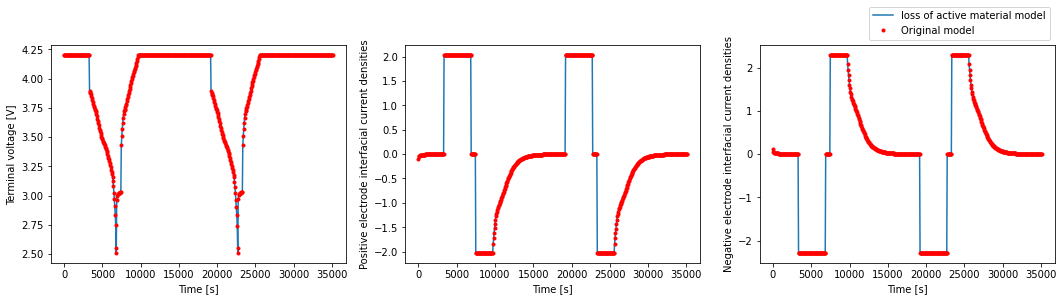

In [4]:

f, (ax1, ax2, ax3) = plt.subplots(1, 3 ,figsize=(18,4))

ax1.plot(t_all, v_all, label="loss of active material model")
ax1.plot(results_og[0,:], results_og[1,:],"r." ,label="Original model")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Terminal voltage [V]")
#ax1.legend()


ax2.plot(t_all, I_if_p, label="loss of active material model")
ax2.plot(results_og[0,:], results_og[2,:],"r." ,label="Original model")
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Positive electrode interfacial current densities")
#ax2.legend()
#ax2.set_xlim(6000,7000)

ax3.plot(t_all, I_if_n, label="loss of active material model")
ax3.plot(results_og[0,:], results_og[3,:],"r." ,label="Original model")
ax3.set_xlabel("Time [s]")
ax3.set_ylabel("Negative electrode interfacial current densities")
ax3.legend(bbox_to_anchor=(1, 1.2))
#ax3.set_xlim(10000,15000)

plt.show()


Text(0, 0.5, 'X-averaged positive electrode LAM ratio')

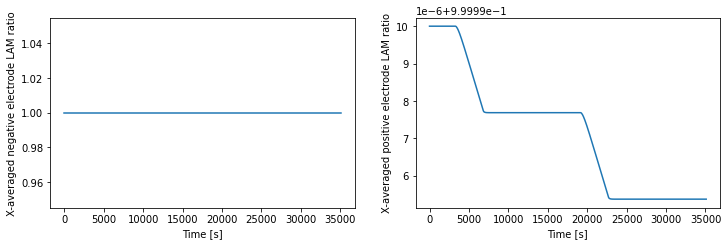

In [5]:
LAM_n_all = solution["X-averaged negative electrode LAM ratio"].entries
LAM_p_all = solution["X-averaged positive electrode LAM ratio"].entries
f, (ax1, ax2) = plt.subplots(1, 2 ,figsize=(12,3.5))
ax1.plot(t_all, LAM_n_all, label="loss of active material model")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("X-averaged negative electrode LAM ratio")

ax2.plot(t_all, LAM_p_all, label="loss of active material model")
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("X-averaged positive electrode LAM ratio")

Text(0, 0.5, 'X-averaged positive tangential stress/ $E_p$')

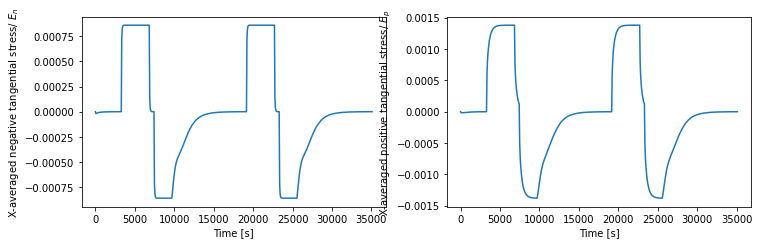

In [7]:
S_t_n_all = solution["X-averaged negative particle surface tangential stress"].entries
S_t_p_all = solution["X-averaged positive particle surface tangential stress"].entries
f, (ax1, ax2) = plt.subplots(1, 2 ,figsize=(12,3.5))
ax1.plot(t_all, S_t_n_all, label="loss of active material model")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("X-averaged negative tangential stress/ $E_n$")

ax2.plot(t_all, S_t_p_all, label="loss of active material model")
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("X-averaged positive tangential stress/ $E_p$")